In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/dataclusterlabs/plastic-object-detection-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chilukuriamulya39
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dataclusterlabs/plastic-object-detection-dataset


100%|██████████| 173M/173M [00:00<00:00, 734MB/s] 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = "/content/plastic-object-detection-dataset"
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical',subset='training')
val_data = datagen.flow_from_directory(data_dir, target_size=(128, 128), batch_size=32, class_mode='categorical',subset='validation')

Found 56 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    '/content/plastic-object-detection-dataset',  # your dataset folder
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    '/content/plastic-object-detection-dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 56 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification: plastic / no plastic
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
 epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.9484 - loss: 0.3785 - val_accuracy: 1.0000 - val_loss: 9.6508e-07
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 1.0000 - loss: 6.2885e-08 - val_accuracy: 1.0000 - val_loss: 8.7515e-13
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 1.0000 - loss: 6.1863e-16 - val_accuracy: 1.0000 - val_loss: 4.0126e-19
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 1.0000 - loss: 1.6490e-19 - val_accuracy: 1.0000 - val_loss: 2.1990e-25
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 1.0000 - loss: 4.0443e-28 - val_accuracy: 1.0000 - val_loss: 2.4210e-31
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 9.9578e-31 - val_accuracy: 1.0000 - val_loss: 7.1997e-37
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 1.0000 - loss: 6.9007e-26 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 1.0000 - loss: 9.6731e-37 -

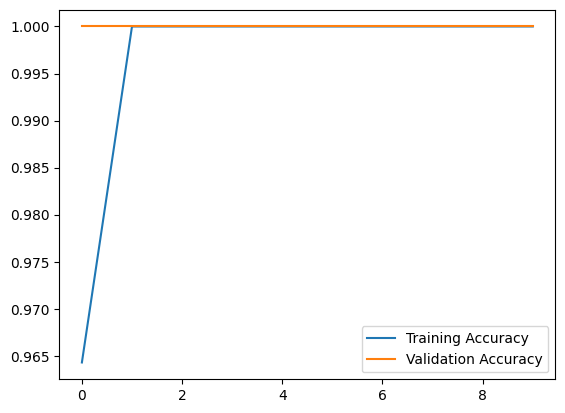

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/plastic_detection_model.h5')

In [ ]:
model.save('/content/drive/MyDrive/plastic_detection_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/plastic_detection_model.keras')  # or .h5

# Check if it loaded correctly
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,609,540 (25.21 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,304,771 (12.61 MB)

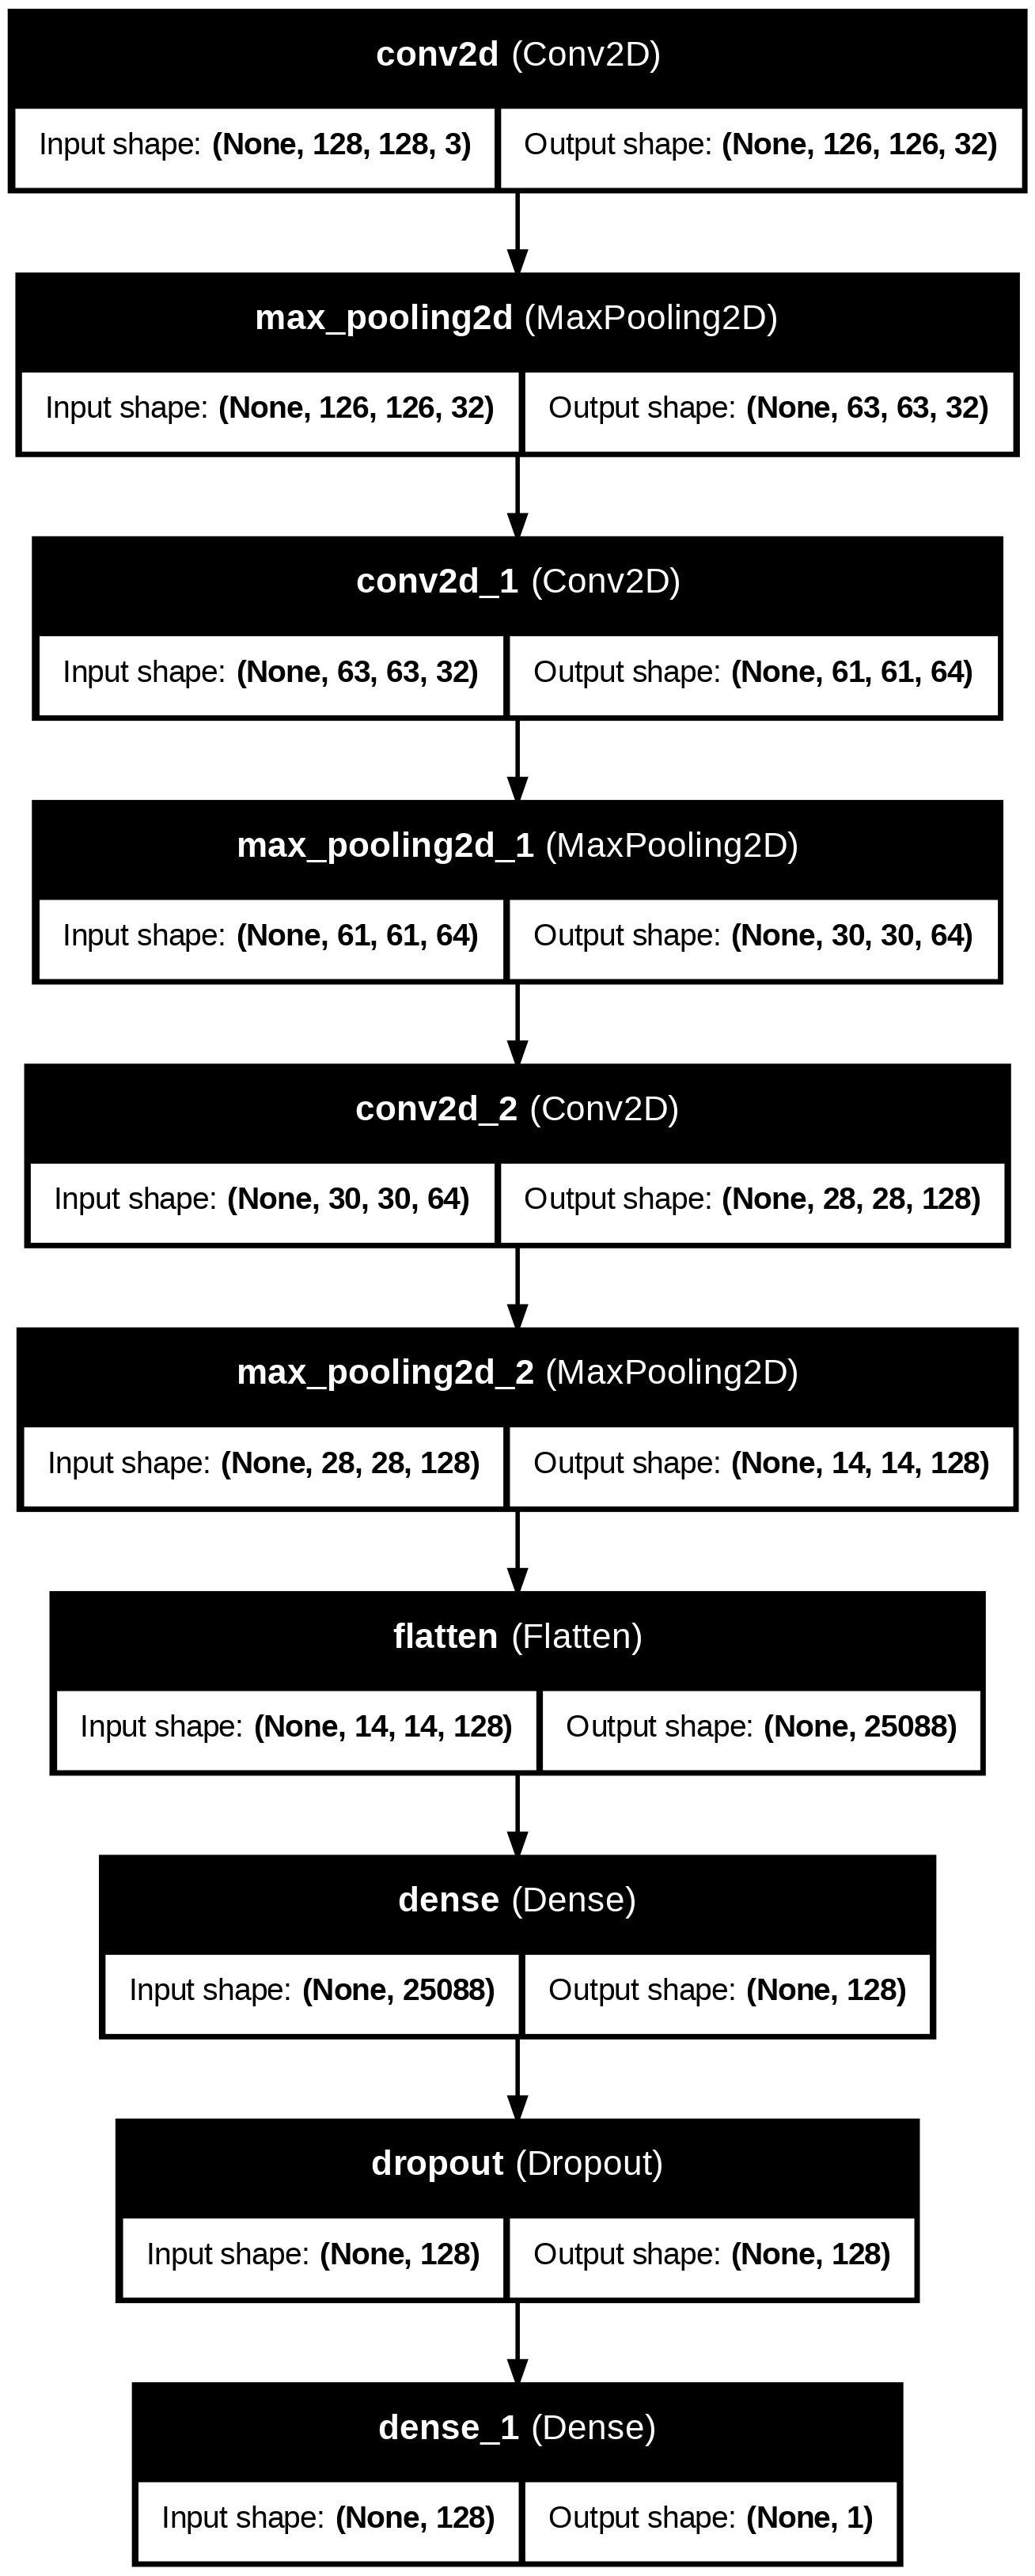

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_structure.png')

In [ ]:
import urllib.request
url ="https://media.istockphoto.com/id/1141999585/photo/underwater-global-problem-with-plastic-rubbish.jpg?s=612x612&w=0&k=20&c=LnHPndHoRgWZpR4Uu2E7n0fZJNuLqUEkHLYoc8Lo29o="
urllib.request.urlretrieve(url, "test_image.jpg")
print("Image downloaded successfully!")

Image downloaded successfully!


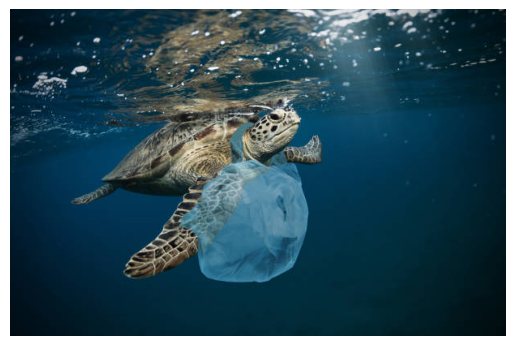

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img("test_image.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img = image.load_img("test_image.jpg", target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = img_array.reshape(1, 128, 128, 3)

prediction = model.predict(img_array)
print("Prediction:",prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Prediction: [[1.]]


In [ ]:
if prediction[0][0] > 0.5:
    print("Plastic detected ✅")
else:
    print("No plastic detected ❌")

Plastic detected ✅


In [1]:
import os

# Path where your dataset is stored (adjust if needed)
dataset_path = '/content/plastic-object-detection-dataset/plastic-images'

count = 0
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            count += 1

print(f"Total images in dataset: {count}")

Total images in dataset: 0


In [2]:
!ls /content

sample_data
